# Exercises using geopandas
Now it is your turn to produce some nice maps using *geopandas*. This week will again use the plant data which was part of last weeks exercises. As you might have noticed it already contains the position of the plants as *latitude* and *longitude*.

## Preparation
Load the relevant libraries and the csv file into pandas that it becomes a regular dataframe.

In [1]:
# load different environment before starting jupyter: "source activate geo_env"

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
import seaborn as sns

df = pd.read_csv('../data-visualization-part2/conventional_power_plants_DE.csv', index_col=0)

/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysalnext` package. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/opt/anaconda3/envs/geo_env/lib/python3.7/site-packages/pysal/contrib/viz/mapping.py:32: UserWarning: Bokeh not installed. Functionality related to it will not work
  warn('Bokeh not installed. Functionality '


## Exercise 1
Create a "map" of the power plants using their position and color them by their technology.

Hints:
* May be a scatterplot would do as a first visualization.

In [2]:
pd.set_option('display.max_columns', None)
df.head()

,name_bnetza,block_bnetza,name_uba,company,street,postcode,city,state,country_code,capacity_net_bnetza,capacity_gross_uba,fuel,technology,chp,chp_capacity_uba,commissioned,commissioned_original,retrofit,shutdown,status,type,lat,lon,eic_code_plant,eic_code_block,efficiency_data,efficiency_source,efficiency_estimate,energy_source_level_1,energy_source_level_2,energy_source_level_3,eeg,network_node,voltage,network_operator,merge_comment,comment
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BNA0012a,Werkskraftwerk Sappi Alfeld,Turbine 5,NaN,Sappi Alfeld GmbH,Mühlenmarsch 1,31061,Alfeld,Niedersachsen,DE,16.0,NaN,Biomass and biogas,Steam turbine,yes,NaN,1988.0,1988,NaN,NaN,operating,NaN,51.984761,9.822831,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,6,Überlandwerk Leinetal GmbH,NaN,NaN
BNA0021,HKW Altenstadt,NaN,NaN,Heizkraftwerk Altenstadt GmbH & Co. KG,Triebstraße 90,86972,Altenstadt,Bayern,DE,9.8,NaN,Biomass and biogas,Steam turbine,no,NaN,1999.0,1999,NaN,NaN,operating,NaN,47.797140,10.858740,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,MS,LEW Verteilnetz GmbH,NaN,NaN
BNA0027,Zellstoff Stendal GmbH,-,Arneburg,Zellstoff Stendal GmbH,Goldbecker Straße 1,39596,Arneburg,Sachsen-Anhalt,DE,138.9,147.0,Biomass and biogas,Steam turbine,yes,600,2004.0,2004,NaN,NaN,operating,CHP,52.727130,12.011150,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,DE0075603959600000E00000000013559 DE0075603959...,30,Infrastrukturbetrieb der Stadt Arneburg,List matching type: Single UBA power plant ass...,NaN
BNA1337b,Blockheizkraftwerk 1,Blockheizkraftwerk 1,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,1.1,NaN,Biomass and biogas,Steam turbine,yes,NaN,2005.0,2005,NaN,NaN,operating,NaN,49.988218,9.155761,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN
BNA1337c,Blockheizkraftwerk 2,Blockheizkraftwerk 2,NaN,DS Smith Paper Deutschland GmbH,Weichertstr. 7,63741,Aschaffenburg,Bayern,DE,0.8,NaN,Biomass and biogas,Steam turbine,yes,NaN,2010.0,2010,NaN,NaN,operating,NaN,49.988218,9.155761,NaN,NaN,NaN,NaN,0.38,Renewable energy,Bioenergy,Biomass and biogas,yes,NaN,20,Aschaffenburger Versorgungs GmbH,NaN,NaN


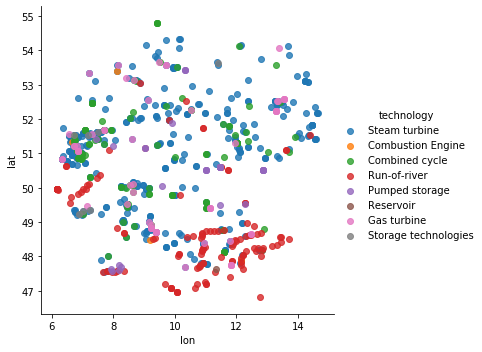

In [3]:
scatterplot = sns.lmplot(x='lon', y='lat', hue='technology', fit_reg=False, data=df)

## Exercise 2
Next, use geopandas to create a Geo Data Frame containing the power plants and their coordinates. Plot a first map and compare it to the results of Exercise 2 to see whether the transformation has been successful. 

Hints:
* A look at this <a href="https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html"> tutorial</a> may help.

In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))
print(gdf.head())

                          name_bnetza          block_bnetza  name_uba  \
id                                                                      
BNA0012a  Werkskraftwerk Sappi Alfeld             Turbine 5       NaN   
BNA0021                HKW Altenstadt                   NaN       NaN   
BNA0027        Zellstoff Stendal GmbH                     -  Arneburg   
BNA1337b         Blockheizkraftwerk 1  Blockheizkraftwerk 1       NaN   
BNA1337c         Blockheizkraftwerk 2  Blockheizkraftwerk 2       NaN   

                                         company               street  \
id                                                                      
BNA0012a                       Sappi Alfeld GmbH       Mühlenmarsch 1   
BNA0021   Heizkraftwerk Altenstadt GmbH & Co. KG       Triebstraße 90   
BNA0027                   Zellstoff Stendal GmbH  Goldbecker Straße 1   
BNA1337b         DS Smith Paper Deutschland GmbH       Weichertstr. 7   
BNA1337c         DS Smith Paper Deutschland GmbH  

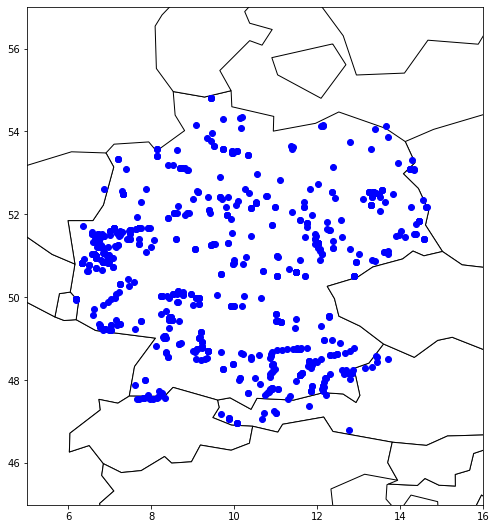

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black',figsize=(7, 10))
gdf.plot(ax=ax, color='blue')
plt.xlim([5,16])
plt.ylim([45,57])
plt.tight_layout()
plt.show()


## Exercise 3 
Add the boundaries of Germany and its states using an appropriate shape file. Finally reduce the map as well as the plants to those located in Bavaria.

Hint:
* The <a href="http://www.geodatenzentrum.de/geodaten/gdz_rahmen.gdz_div?gdz_spr=deu&gdz_akt_zeile=5&gdz_anz_zeile=1&gdz_unt_zeile=15&gdz_user_id=0">The Service Centre of the Federal Government for Geo-Information and Geodesy </a> is maybe a good source for geospatial data.

A:

In [12]:
gdf_states = gpd.read_file("DEU_shape/DEU_adm1.shp") # source: https://gadm.org/
gdf_states

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,86,DEU,Germany,1,Baden-Württemberg,Land,State,None,None,"MULTIPOLYGON (((8.70837 47.71556, 8.70918 47.7..."
1,86,DEU,Germany,2,Bayern,Land,State,None,Bavaria,"POLYGON ((10.13386 50.55000, 10.13980 50.54252..."
2,86,DEU,Germany,3,Berlin,Land,State,None,None,"POLYGON ((13.17789 52.39032, 13.16575 52.39050..."
3,86,DEU,Germany,4,Brandenburg,Land,State,None,None,"POLYGON ((13.87951 53.50107, 13.87927 53.49908..."
4,86,DEU,Germany,5,Bremen,Land,State,None,None,"MULTIPOLYGON (((8.50506 53.23289, 8.51754 53.2..."
5,86,DEU,Germany,6,Hamburg,Land,State,None,None,"POLYGON ((10.07162 53.71823, 10.07150 53.72192..."
6,86,DEU,Germany,7,Hessen,Land,State,None,Hesse,"POLYGON ((9.49877 51.63152, 9.50474 51.62795, ..."
7,86,DEU,Germany,8,Mecklenburg-Vorpommern,Land,State,None,Mecklenburg-West Pomerania,"MULTIPOLYGON (((14.26472 53.71069, 14.26472 53..."
8,86,DEU,Germany,9,Niedersachsen,Land,State,None,Lower Saxony,"MULTIPOLYGON (((6.86528 53.59597, 6.86528 53.5..."
9,86,DEU,Germany,10,Nordrhein-Westfalen,Land,State,None,North Rhine-Westphalia,"POLYGON ((8.66628 52.52528, 8.67277 52.51795, ..."


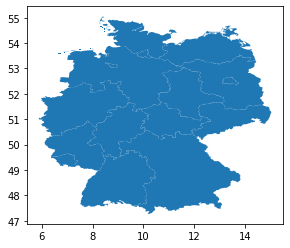

In [13]:
gdf_states.plot()

B (like in Bavaria):

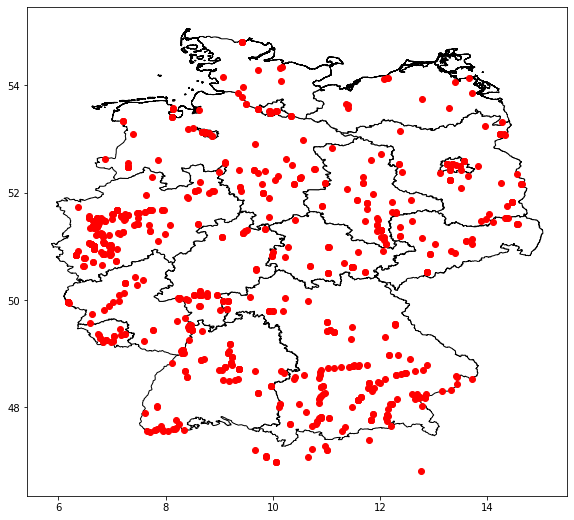

In [15]:
ax2 = gdf_states.plot(
    color='white', edgecolor='black',figsize=(10, 9))
gdf.plot(ax=ax2, color='red')

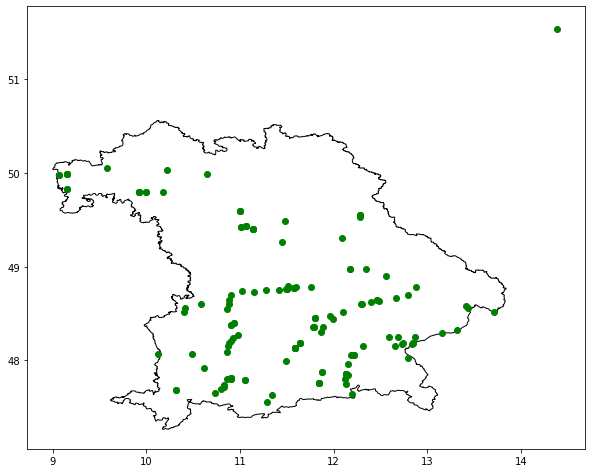

In [28]:
gdf_shape_bavaria = states_gdf[states_gdf['NAME_1']=='Bayern'] # states_gdf['NAME_1']=='Bayern' returns only true/false
df_bavaria = df[df['state']=='Bayern']

gdf_bavaria_ = gpd.GeoDataFrame(df_bavaria, geometry=gpd.points_from_xy(df_bavaria['lon'], df_bavaria['lat']))

ax3 = gdf_shape_bavaria.plot(
    color='white', edgecolor='black',figsize=(10, 9))
gdf_bavaria_.plot(ax=ax3, color='green')
